In [1]:
# 载入库，做基本的设置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
# 警告库

warnings.filterwarnings('ignore')
# 忽略警告信息

plt.rcParams['font.sans-serif'] = ['SimHei']   # 在图形中能正常显示中文
plt.rcParams['axes.unicode_minus'] = False     # 在图形中能正常显示负号

In [2]:
# 读取数据
titanic_df = pd.read_csv('data/train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 用函数实现分类变量交叉表分析并进行百分比堆叠柱状图绘制

In [4]:
pd.crosstab(
    index = titanic_df.Survived,
    columns = titanic_df.Sex
)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [5]:
pd.crosstab(
    index = titanic_df.Survived,
    columns = titanic_df.Sex,
    normalize='columns'
)

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


<AxesSubplot:xlabel='Sex'>

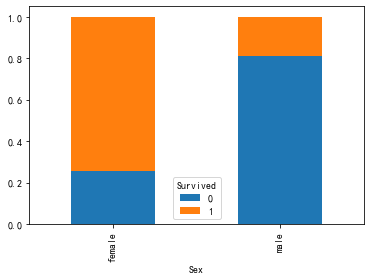

In [7]:
pd.crosstab(
    index = titanic_df.Survived,
    columns = titanic_df.Sex,
    normalize='columns'
).T.plot(
    kind = 'bar',
    stacked = True
)

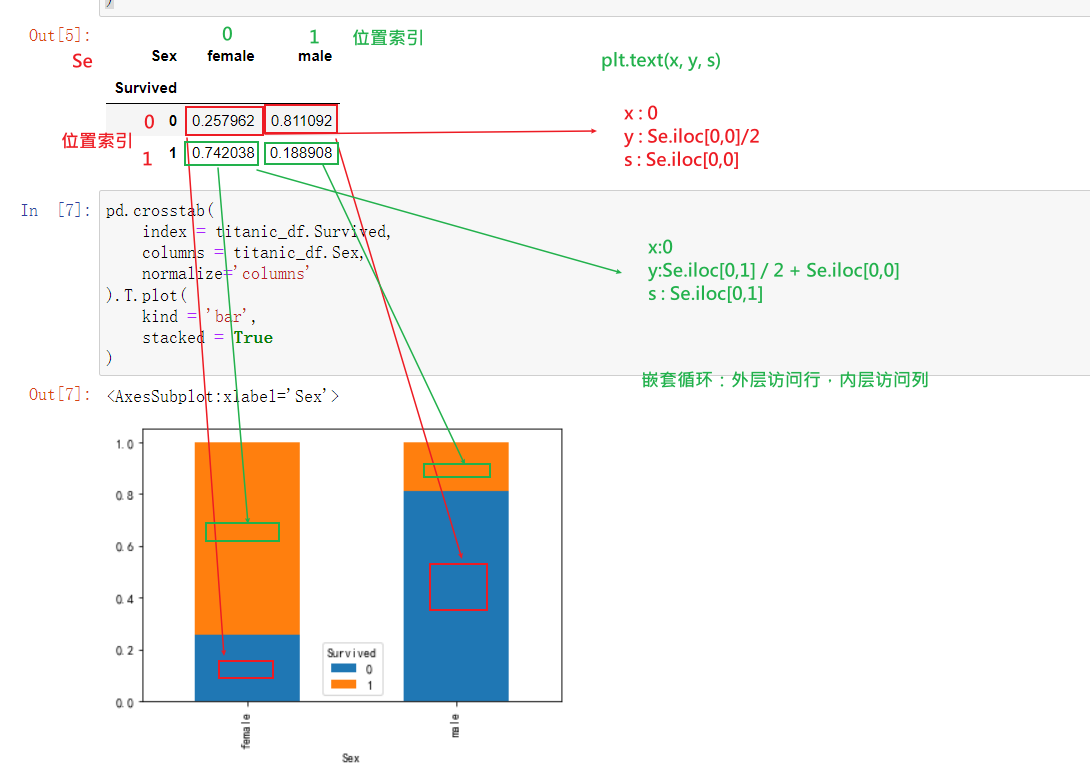

In [41]:
def cate_cross_analysis(df = titanic_df, feature1 = None, feature2 = 'Survived'):
    """
    函数功能：
        传入指定的分类变量，研究其对Survived的影响
        通过交叉表观察频数和百分比
        通过百分比堆积柱状图进行可视化
    函数参数：
        df : 构建交叉表的数据集，默认是titanic_df
        feature1 : 影响因素
        feature2 : 被影响因素，默认是Survived
    函数返回值：
        None
    """
    # 频数交叉表
    c_tab1 = pd.crosstab(
        index = df[feature2],
        columns = df[feature1]
    )
    
    # 百分比交叉表
    c_tab2 = pd.crosstab(
        index = df[feature2],
        columns = df[feature1],
        normalize = 'columns'
    )
    print('频数交叉表')
    display(c_tab1)
    print('百分比交叉表')
    display(c_tab2)
    # print('-'*80)   # 调试用
    
    # 绘图用的交叉表（从c_tab2转置得到）
    c_plot = c_tab2.T
    # print('绘图用的数据集')   # 调试用
    # display(c_plot)  # 调试用
    
    # 绘制百分比堆叠柱状图
    c_plot.plot(
        kind = 'bar',
        stacked = True,
        rot = 30,
        color = sns.color_palette('Set2')
    )
    
    # 数据标签
    for x in range(len(c_plot)):
        # 遍历绘图用的数据集的行位置索引，对应百分比堆积柱状图中每个柱体的x轴坐标
        # print('x轴坐标:', x)  # 调试用
        for y in range(len(c_plot.iloc[x])):
            # 遍历每个柱体中对应的数据构成的Series的位置索引（绘图用的数据集中每行的数据）
            # print('x, y轴坐标：',x, y)  # 调试用
            # print('数据标签内容：', c_plot.iloc[x,y])  # 调试用
            
            # 计算数据标签所在的y真实坐标
            if y == 0:
                y_ = c_plot.iloc[x,y] / 2
                # 下方的柱体数据标签的位置是下方柱体高度的一半
            else:
                y_ = c_plot.iloc[x,y] / 2 + c_plot.iloc[x, y-1]
                # 上方柱体数据标签的位置是上方柱体高度的一半加上下方柱体的高度
            # print('真实的x,y坐标：', x, y_)  # 调试用
            
            plt.text(
                x,
                y_,
                '%.1f%%'%(c_plot.iloc[x,y] * 100),
                ha = 'center',
                va = 'center'
            )
            
    # 辅助元素
    plt.title(f'{feature1} vs {feature2}')
    plt.ylabel('Percent')
    plt.legend(loc = (1.01,0.85))
    plt.show()

频数交叉表


Sex,female,male
Survived,,
0,81,468
1,233,109


百分比交叉表


Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


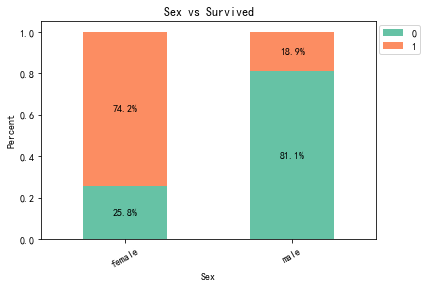

In [42]:
cate_cross_analysis(feature1='Sex')

频数交叉表


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


百分比交叉表


Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


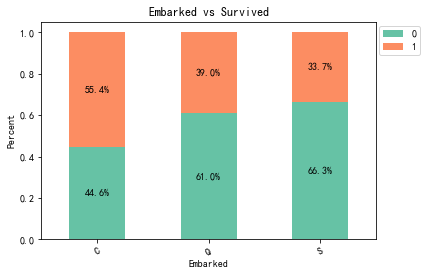

In [43]:
cate_cross_analysis(feature1 = 'Embarked')

## 用随机值填充缺失值

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
titanic_df.Age.isnull().sum()

177

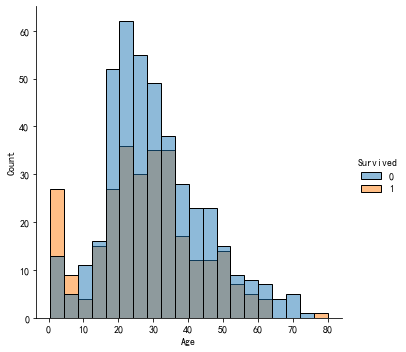

In [48]:
sns.displot(
    x = 'Age',
    hue = 'Survived',
    data = titanic_df
)

以10~60之间的随机值填充年龄的缺失值

In [50]:
# fillna可以用Series作为填充的值，因此，可以构建一个元素数量和Age的缺失值数量一致，值由10~60的随机值构成的Series
Age_s = pd.Series(np.random.randint(10, 61, titanic_df.Age.isnull().sum()))

In [51]:
Age_s

0      45
1      35
2      29
3      46
4      40
       ..
172    22
173    18
174    55
175    47
176    19
Length: 177, dtype: int32

In [53]:
titanic_df['Age1'] = titanic_df.Age.fillna(
    Age_s
)
# 直接填充不行，因为会遇到index不匹配的问题

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [55]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age1         749 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [56]:
Age_s

0      45
1      35
2      29
3      46
4      40
       ..
172    22
173    18
174    55
175    47
176    19
Length: 177, dtype: int32

In [57]:
titanic_df.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

填充缺失值所用的Series，其索引必须和缺失值的索引一致

In [59]:
titanic_df.loc[titanic_df.Age.isnull()].index
# Age中的缺失值对应的索引

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [60]:
Age_s1 = pd.Series(
    np.random.randint(10, 61, titanic_df.Age.isnull().sum()),
    index = titanic_df.loc[titanic_df.Age.isnull()].index
)

In [61]:
Age_s1

5      44
17     18
19     59
26     56
28     24
       ..
859    45
863    40
868    22
878    33
888    26
Length: 177, dtype: int32

In [62]:
titanic_df['Age2'] = titanic_df.Age.fillna(Age_s1)

In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [64]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age1         749 non-null    float64
 13  Age2         891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


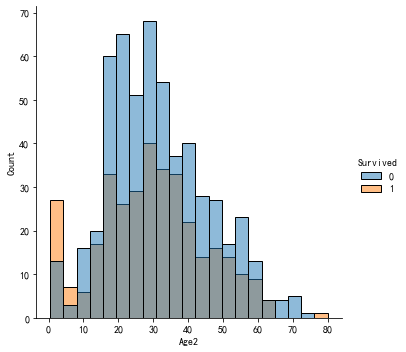

In [65]:
sns.displot(
    x = 'Age2',
    hue = 'Survived',
    data = titanic_df
)

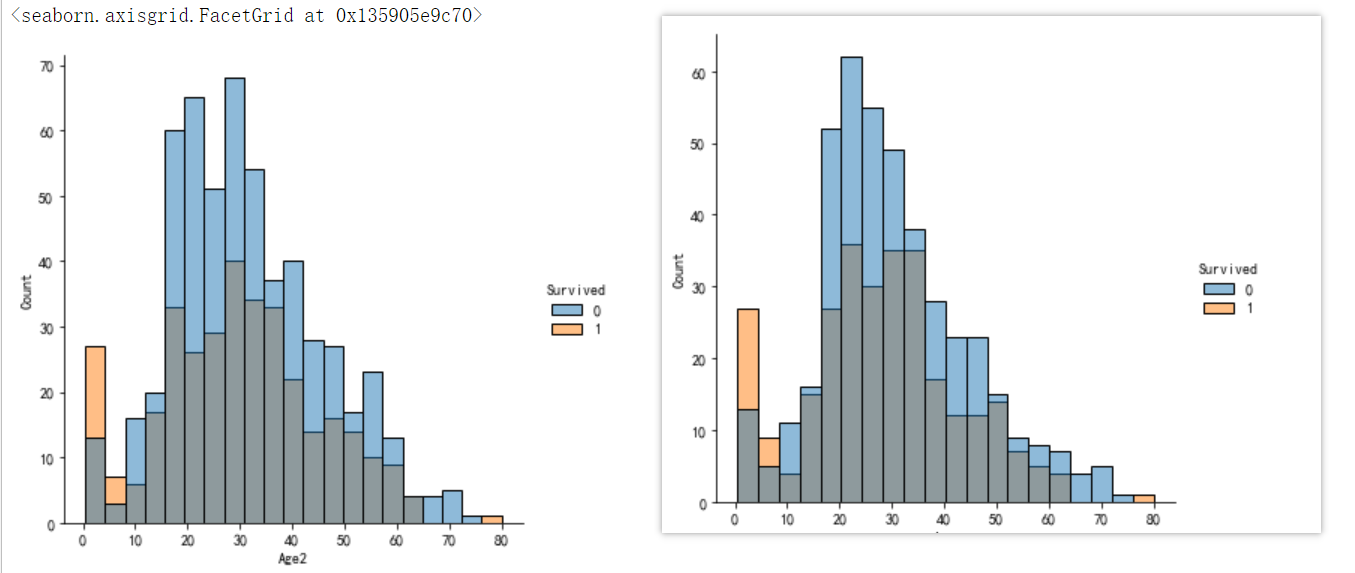